In [2]:
import scipy.sparse as sparse
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import sympy
import scipy.special as sps


In [3]:
x = 4

for n in range(1,x+1):
    lege = sps.legendre(n)
    print(lege)
    sum = 0
    sum -= lege[0]
    for i in range(n):
        if(lege[i+1] != 0):sum /= lege[i+1]
    x = sum
    print(f"i = {n} ==>> x = {x}".format(n, x), "\n" "------------")



 
1 x
i = 1 ==>> x = 0.0 
------------
     2
1.5 x - 0.5
i = 2 ==>> x = 0.3333333333333333 
------------
     3
2.5 x - 1.5 x
i = 3 ==>> x = -0.0 
------------
       4             3        2
4.375 x + 4.857e-16 x - 3.75 x + 2.429e-16 x + 0.375
i = 4 ==>> x = 1.9376501396281573e+29 
------------


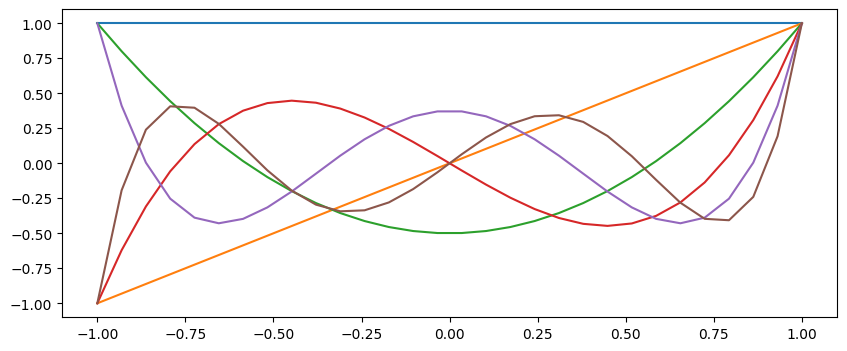

In [29]:
X = np.linspace(-1,1,30)
x = 5
fig, ax = plt.subplots(figsize=(10,4))
for n in range(x+1):
        lege = sps.legendre(n) 
        Y = lege(X)
        ax.plot(X,Y)
plt.show()

2.  Vyrobte sparse matici o rozměrech (n**2 x n**2)

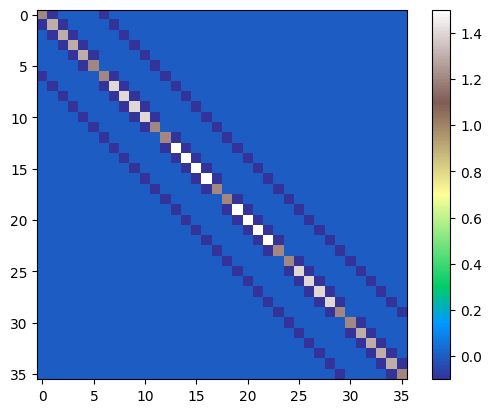

In [48]:
import scipy.sparse as sparse
import numpy as np
import matplotlib.pyplot as plt

def pocet_sousedu(i,j,n):
    if((i != 0 and i != n-1) and (j != 0 and j != n-1)): return 4
    elif(i,j == 0,0 or n-1,n-1 or n-1,n or n,n-1): return 2
    else: return 3

def create_vertex(n, diag_coeficient):
    matrix = np.ones((n,n))*0
    first = 1
    for m in range(n):
        for s in range(n):
            if(m == s):
                k = pocet_sousedu(m,s,n)
                if(k == 2 and first == 0):
                    matrix[m-1,s] = -epsilon
                    matrix[m,s-1] = -epsilon
                    matrix[m,s] = 1+(k*epsilon)
                if(k == 2 and first == 1):
                    matrix[m+1,s] = -epsilon
                    matrix[m,s+1] = -epsilon
                    first = 0
                    matrix[m,s] = 1+(k*epsilon)
                if(k == 4):
                    matrix[m,s-1:s+2] = -epsilon
                    matrix[m-1:m+2,s] = -epsilon
                    matrix[m,s] = 1+(k*epsilon)-diag_coeficient
    return matrix

def diag(n):
    matrix = np.ones((n,n))*0
    for m in range(n):
        for s in range(n):
            if(m==s):matrix[m,s] = -epsilon
    return matrix

n = 6
epsilon = 1e-1
A = sparse.lil_matrix((n*n, n*n))
diag_coeficient = epsilon
pocet_iteraci = 1

for i in range(n):
    for j in range(n):
        if(i==j):
            vertex = create_vertex(n, diag_coeficient)
            A[i*n:n*(i+1), j*n:n*(j+1)] = vertex
            
            if(n/pocet_iteraci > n/(n/2) and n%2 == 1):
                diag_coeficient -= epsilon
                pocet_iteraci += 1
            elif(n/pocet_iteraci >= n/(n/2) and n%2 == 0):
                if(n/pocet_iteraci != n/(n/2)):diag_coeficient -= epsilon
                pocet_iteraci += 1
            else:
                diag_coeficient += epsilon
                pocet_iteraci += 1
                
        if(i+1 == j or j+1 ==i):
            matri = diag(n)
            A[i*n:n*(i+1), j*n:n*(j+1)] = matri

#print(A.todense())
plt.imshow(A.todense(), cmap='terrain')
plt.colorbar()
plt.show()

In [ ]:
"""""
#? coo = coo_matrix((data,(row,cols)))

#! stare (inspirace)
def pocet_susedu(i,j,n):
if(i != 0 and j != 0 and i != n**2 and j != n**2): return 4
elif(i,j == 0,0 or n**2,n**2 or 0,n**2 or n**2,0): return 2
else: return 3

#* vytvori blok
def create_vertex(i,j,n,A):
    vertex = []*0
    for m in range(i*n,i*(n+1)):
        for k in range(j*n,j*(n+1)):
            vertex.append(A[m,k])
    return 

#* pro celou matici najednou, ne bloky.. (urcuje k)
def pocet_sousedu(i,j,n):
    if(i != n*i and n*(i+1)-1 and j != n*j and n*(j+1)-1): return 4
    elif(i,j == n*i,n*j or n*(i+1)-1,n*(j+1)-1 or n*(i+1)-1,n*j or n*i,n*(j+1)-1): return 2
    else: return 3

#* diag kooficient
vertex = create_vertex(n, diag_coeficient)
A[i*n:n*(i+1), j*n:n*(j+1)] = vertex
if(n/pocet_iteraci > n/2 and n%2 == 1):
                diag_coeficient -= epsilon
                pocet_iteraci += 1
            elif(n/pocet_iteraci >= n/2 and n%2 == 0):
                if(n/pocet_iteraci != n/2):diag_coeficient -= epsilon
                pocet_iteraci += 1
            else: diag_coeficient += epsilon

if(i == 0 or i == n):diag_coeficient = epsilon
            vertex = create_vertex(n, diag_coeficient)
            A[i*n:n*(i+1), j*n:n*(j+1)] = vertex
            if(i == 0 or i == n):diag_coeficient = 0
"""""

3.ukol kostra

In [ ]:
# create matrix A using vectorized operations, creating indices for rows and columns and data
# use sparse.csr_matrix((data, (i, j)))
import numpy as np
from scipy.sparse import csr_matrix

n = 3
epsilon = 0.1

def A_efficiently(n, epsilon):
    ## --- Mimodiagonální prvky
    # Vnitřní horizontální hrany
    horizontal_up_idx =  np.linspace(0,n*n-2,n*n-1)+1   # TODO - vytvořte indexy buněk nad hranou
    horizontal_low_idx =    # TODO - vytvořte indexy buněk pod hranou
    row_horizontal =    # TODO - vytvořte indexy řádků pro vnitřní horizontální hrany
    col_horizontal =    # TODO - vytvořte indexy sloupců pro vnitřní horizontální hrany
    data_horizontal = -epsilon * np.ones(2 * (n * n - n)) # data jsou vždy stejná


    # Vnitřní vertikální hrany
    index_matrix_vertical = np.arange(n * n).reshape((n, n)).T.flatten() # indexy buněk přeházené pro vertikální hranu
    vertical_left_idx =     # TODO použijte index_matrix_vertical[...] pro vytvoření indexů buněk vlevo od hran
    vertical_right_idx =    # TODO použijte index_matrix_vertical[...] pro vytvoření indexů buněk vpravo od hran
    row_vertical =     # TODO - vytvořte indexy řádků pro vnitřní vertikální hrany
    col_vertical =     # TODO - vytvořte indexy sloupců pro vnitřní vertikální hrany
    data_vertical = -epsilon * np.ones(2 * (n * n - n)) # data jsou vždy stejná

    ## --- Diagonála (všechny prvky)
    diagonal_idx = np.arange(n * n)
    row_idx_diag = diagonal_idx
    col_idx_diag = diagonal_idx
    data_diag = (1 + 4 * epsilon) * np.ones(n * n)

    # odečteme epsilon pro každou z hran
    # horní hrana
    # TODO - odečtěte epsilon pro horní hranu
    # dolní hrana
    # TODO - odečtěte epsilon pro dolní hranu
    # levá hrana
    # TODO - odečtěte epsilon pro levou hranu
    # pravá hrana
    # TODO - odečtěte epsilon pro pravou hranu

    ## --- spojení všech vektorů a sestavení matice
    # spojíme všechny vnitřní hrany a diagonálu
    row = np.hstack((row_idx_diag, row_horizontal, row_vertical))
    col = np.hstack((col_idx_diag, col_horizontal, col_vertical))
    data = np.hstack((data_diag, data_horizontal, data_vertical))

    # vyrobíme matici
    A_efficiently =     # TODO - vytvořte matici v CSR formátu z dat, řádků a sloupců

    return A_efficiently

print(A_efficiently(n, epsilon).todense())

3.Ukol

In [15]:
import scipy.sparse as sparse
import numpy as np

def A_efficiently(n, epsilon):
    #Diagonaly -+n
    col1 = np.arange(1, n*n-n+1) + n-1
    row1 = np.arange(0, n*n-n)
    col2 = np.arange(1, n*n-n+1)-1
    row2 = np.arange(0, n*n-n) +n
    data1 = -epsilon * np.ones((n * n - n)*2)

    #Diag02 up
    col3 = np.arange(1, n*n)
    row3 = np.arange(0, n*n-1)
    data3 = -epsilon * np.ones((n * n)-1)
    data3[n-1::n] = 0

    #diag02 down
    row4 = np.arange(1, n*n)
    col4 = np.arange(0, n*n-1)
    data4 = -epsilon * np.ones((n * n)-1)
    data4[n-1::n] = 0

    #diagonala...


    data = np.hstack((data1,data3,data4))
    row = np.hstack((row1,row2,row3,row4))
    col = np.hstack((col1,col2,col3,col4))

    csr = sparse.csr_matrix((data, (row, col)))
    return csr

n = 3
epsilon = 0.1
csr = A_efficiently(n, epsilon)
print(csr.todense())

[[ 0.  -0.1  0.  -0.1  0.   0.   0.   0.   0. ]
 [-0.1  0.  -0.1  0.  -0.1  0.   0.   0.   0. ]
 [ 0.  -0.1  0.   0.   0.  -0.1  0.   0.   0. ]
 [-0.1  0.   0.   0.  -0.1  0.  -0.1  0.   0. ]
 [ 0.  -0.1  0.  -0.1  0.  -0.1  0.  -0.1  0. ]
 [ 0.   0.  -0.1  0.  -0.1  0.   0.   0.  -0.1]
 [ 0.   0.   0.  -0.1  0.   0.   0.  -0.1  0. ]
 [ 0.   0.   0.   0.  -0.1  0.  -0.1  0.  -0.1]
 [ 0.   0.   0.   0.   0.  -0.1  0.  -0.1  0. ]]
